In [1]:
import pandas as pd
import re
from numpy import array
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

In [2]:
df = pd.read_csv('Downloads/tcc_ceds_music.csv')
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [3]:
df.shape

(28372, 31)

In [4]:
# Tweet Scores
fig = px.histogram(df, x="age")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='age')
fig.show()

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])

In [8]:
textt = " ".join(review for review in df.lyrics)
wordcloud = WordCloud(stopwords=stopwords, max_font_size=70, relative_scaling=.5).generate(textt)

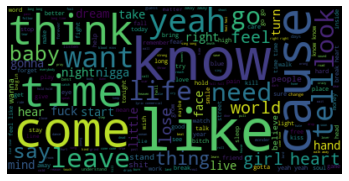

In [9]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud11.png')
plt.show()

In [10]:
top=df["topic"].value_counts()
top

sadness       6096
violence      5710
world/life    5420
obscene       4882
music         2303
night/time    1825
romantic      1524
feelings       612
Name: topic, dtype: int64

In [11]:
# split df - categories:
sad = df[df['topic'] == 'sadness']
rom = df[df['topic'] == 'romantic']
mus = df[df['topic'] == 'music']
wor = df[df['topic'] == 'world/life']
obs = df[df['topic'] == 'obscene']
vio = df[df['topic'] == 'violence']
fee = df[df['topic'] == 'feelings']
nig = df[df['topic'] == 'night/time']

In [12]:
stopwords.update(["like", "come", "know"]) 

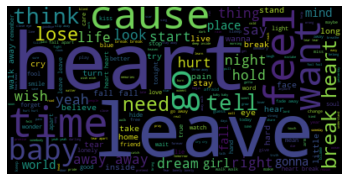

In [13]:
sad = " ".join(review for review in sad.lyrics)
wordcloud2 = WordCloud(stopwords=stopwords).generate(sad)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

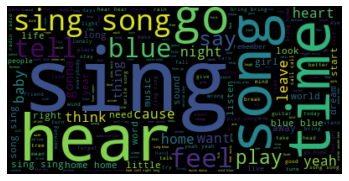

In [14]:
mus = " ".join(review for review in mus.lyrics)
wordcloud3 = WordCloud(stopwords=stopwords).generate(mus)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

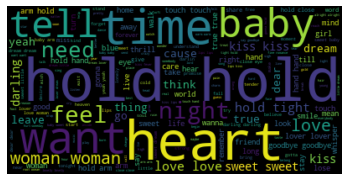

In [15]:
rom = " ".join(review for review in rom.lyrics)
wordcloud4 = WordCloud(stopwords=stopwords).generate(rom)
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

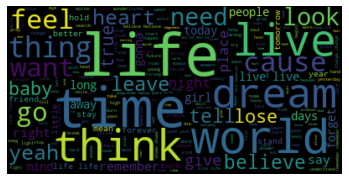

In [16]:
wor = " ".join(review for review in wor.lyrics)
wordcloud5 = WordCloud(stopwords=stopwords).generate(wor)
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis("off")
plt.show()

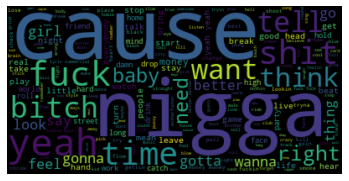

In [17]:
obs = " ".join(review for review in obs.lyrics)
wordcloud5 = WordCloud(stopwords=stopwords).generate(obs)
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis("off")
plt.show()

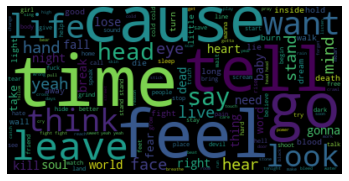

In [18]:
vio = " ".join(review for review in vio.lyrics)
wordcloud6 = WordCloud(stopwords=stopwords).generate(vio)
plt.imshow(wordcloud6, interpolation='bilinear')
plt.axis("off")
plt.show()

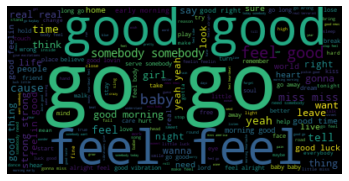

In [19]:
fee = " ".join(review for review in fee.lyrics)
wordcloud7 = WordCloud(stopwords=stopwords).generate(fee)
plt.imshow(wordcloud7, interpolation='bilinear')
plt.axis("off")
plt.show()

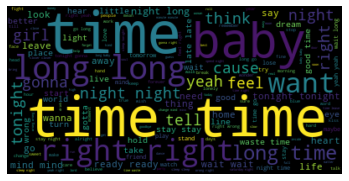

In [20]:
nig = " ".join(review for review in nig.lyrics)
wordcloud8 = WordCloud(stopwords=stopwords).generate(nig)
plt.imshow(wordcloud8, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [22]:
from sklearn.model_selection import train_test_split
X = df.lyrics
y = df.topic
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [23]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [24]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9064849624060151
              precision    recall  f1-score   support

    feelings       0.98      0.68      0.81       184
       music       0.92      0.88      0.90       719
  night/time       0.92      0.83      0.88       538
     obscene       0.94      0.95      0.94      1482
    romantic       0.96      0.75      0.84       444
     sadness       0.88      0.94      0.91      1802
    violence       0.91      0.90      0.90      1752
  world/life       0.88      0.94      0.91      1591

    accuracy                           0.91      8512
   macro avg       0.92      0.86      0.89      8512
weighted avg       0.91      0.91      0.91      8512

Wall time: 858 ms
